# 目录
## sklearn 逻辑回归 多分类
## sklearn 受限玻尔兹曼机 数字分类
## keras 神经网络 数字分类

# Multi-class Classiﬁcation and Neural Networks
- Multi-class Classiﬁcation
- Neural Networks

## 使用sklearn  Plot multinomial and One-vs-Rest Logistic Regression

In [77]:
# 加载测试数据
import numpy as np
from sklearn.datasets import make_blobs
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
print type(X), X.shape
print type(y), y.shape
print X[0:5,:]

<type 'numpy.ndarray'> (1000, 2)
<type 'numpy.ndarray'> (1000,)
[[-5.09227256  0.87072588]
 [-4.76257213 -0.39181357]
 [-6.3026177  -0.16682567]
 [ 3.90197303 -0.78399462]
 [ 0.970112    2.18421299]]


In [78]:
import numpy as np
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
print type(X), X.shape
print X[0:5, :]
print y[0:5]

<type 'numpy.ndarray'> (1000, 2)
[[-2.38519938  0.02641654]
 [-1.74830343 -1.4226907 ]
 [-2.45431681 -1.46071435]
 [ 1.87438706 -0.16039893]
 [-0.48564039  2.81507798]]
[0 0 0 2 1]


In [79]:
# 可视化数据
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='newton-cg',multi_class='multinomial')
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
clf.classes_ # 可知是3分类

array([0, 1, 2])

In [81]:
type(clf.classes_)

numpy.ndarray

In [82]:
colors = 'rgb'
print type(zip(clf.classes_, colors))
print zip(clf.classes_, colors)

<type 'list'>
[(0, 'r'), (1, 'g'), (2, 'b')]


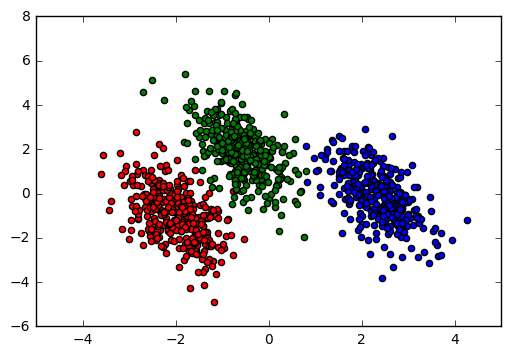

In [83]:
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)
plt.show()

In [84]:
# 系数和截距
print clf.coef_
print clf.intercept_

[[-4.51721919 -1.56053173]
 [-0.08930402  0.72633442]
 [ 4.60652321  0.83419731]]
[-1.69858141  2.89706491 -1.1984835 ]


In [85]:
# 这个用来画 决策边界的方法值得学习
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [86]:
print type(Z)
print Z.shape
print Z

<type 'numpy.ndarray'>
(615, 495)
[[0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


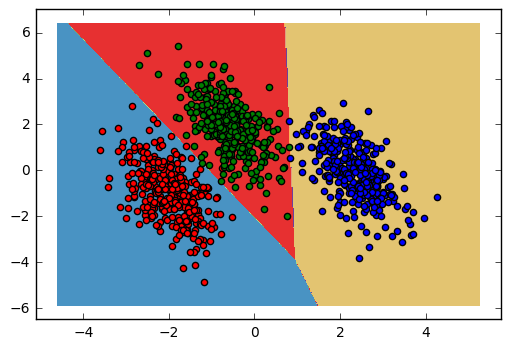

In [87]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

plt.show()

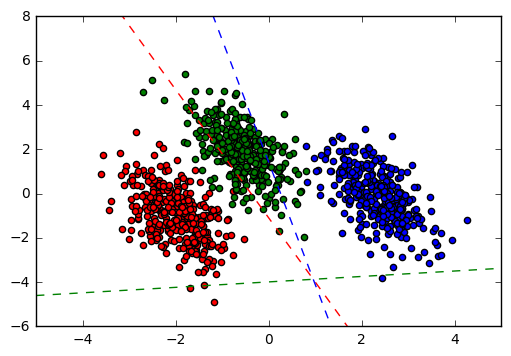

In [88]:
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)
# xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)

for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)

plt.show()

## 上面边界线有点奇怪

# sklearn受限玻尔兹曼机数字分类

In [117]:
# 记载数据
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images
y = digits.target
print type(X), X.shape
print type(y), y.shape

<type 'numpy.ndarray'> (1797, 8, 8)
<type 'numpy.ndarray'> (1797,)


In [118]:
X[0].shape
m = np.size(X, axis=0)
m

1797

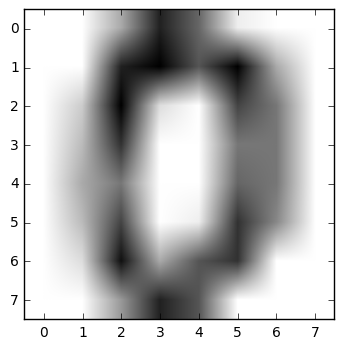

In [119]:
plt.imshow(X[0], cmap=plt.cm.gray_r)
plt.show()

In [126]:
X = X.reshape((m, 64))
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling
X.shape
X[0] # 受限玻尔兹曼机输入必须为0-1

array([ 0.        ,  0.        ,  0.31246875,  0.81241875,  0.56244375,
        0.06249375,  0.        ,  0.        ,  0.        ,  0.        ,
        0.81241875,  0.93740625,  0.6249375 ,  0.93740625,  0.31246875,
        0.        ,  0.        ,  0.18748125,  0.93740625,  0.1249875 ,
        0.        ,  0.68743125,  0.49995   ,  0.        ,  0.        ,
        0.26664   ,  0.749925  ,  0.        ,  0.        ,  0.49995   ,
        0.53328   ,  0.        ,  0.        ,  0.35710714,  0.49995   ,
        0.        ,  0.        ,  0.56244375,  0.57137143,  0.        ,
        0.        ,  0.249975  ,  0.68743125,  0.        ,  0.06249375,
        0.749925  ,  0.43745625,  0.        ,  0.        ,  0.1249875 ,
        0.8749125 ,  0.31246875,  0.6249375 ,  0.749925  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.3749625 ,  0.81241875,
        0.6249375 ,  0.        ,  0.        ,  0.        ])

In [127]:
n = np.size(X, axis=1)
n

64

In [128]:
# 分成训练集和测试集
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [129]:
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1437, 64) (1437,)
(360, 64) (360,)


In [133]:
# 我使用逻辑回归,受限玻尔兹曼机
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
logistic = LogisticRegression(C=6000)
rbm = BernoulliRBM(n_components=100, learning_rate=0.06, n_iter=10, random_state=0, verbose=1)
from sklearn.pipeline import Pipeline
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [134]:
# Training RBM-Logistic Pipeline
classifier.fit(X_train, y_train)
# Training Logistic regression
logistic_classifier = LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -27.67, time = 0.07s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -26.92, time = 0.06s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.99, time = 0.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.09, time = 0.04s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -24.05, time = 0.04s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -23.79, time = 0.09s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -23.42, time = 0.04s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -23.00, time = 0.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -22.60, time = 0.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -22.47, time = 0.04s


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
# 评价
from sklearn import metrics
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        y_test,
        logistic_classifier.predict(X_test))))

Logistic regression using RBM features:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.91      0.94        35
          2       1.00      0.94      0.97        36
          3       0.88      0.97      0.92        29
          4       0.94      0.97      0.95        30
          5       0.95      0.97      0.96        40
          6       0.98      1.00      0.99        44
          7       0.93      0.97      0.95        39
          8       1.00      0.92      0.96        39
          9       0.93      0.90      0.91        41

avg / total       0.96      0.96      0.96       360


Logistic regression using raw pixel features:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.91      0.89      0.90        35
          2       0.97      0.94      0.96        36
          3       0.90      0.97      0.93        29
        

In [139]:
rbm.components_.shape # 这个应该是隐藏层的参数

(100, 64)

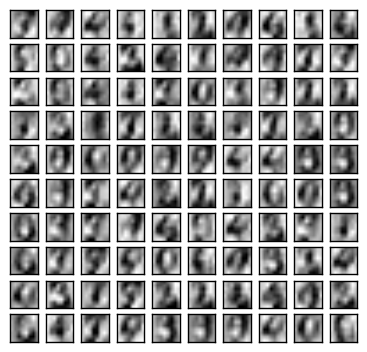

In [147]:
# 中间隐藏层的图像
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i+1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
    
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

# 下面使用Keras构建神经网络来识别手写数字

In [162]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [163]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape
print y_train.shape

(60000, 28, 28)
(60000,)


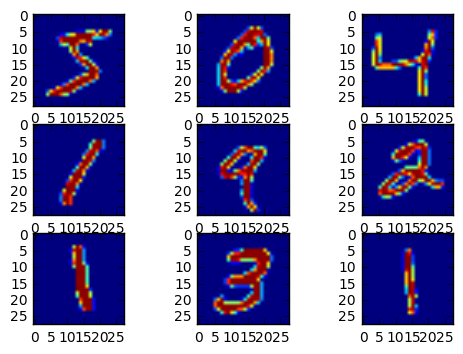

In [164]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
plt.show() # 并不是灰度图，其像素不是0，1

In [165]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [166]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
X_train[0]

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [167]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [169]:
# 目标矩阵改为one-hot格式
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [170]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

## 构建3层的神经网络

In [171]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data, #防止过拟合
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## 编译模型
Keras构建在Theano之上（现在也支持TensorFlow），两者都允许你用Python定义计算图，之后它们将在CPU 或者 GPU上高校运行，而没有python解释器的开销
编译一个模型的时候，Keras要求你指定损失函数和优化器。损失函数我们将使用categorical crossentropy（分类交叉熵），它适合用于二类分布问题
我们的预期是十类数字概率分布（例如，该图片80%的可能性是3，10%的可能性是8，5%的可能性是2，等等），我们的目标是正确分类的概率是100%，其他为0。 交叉熵是一种度量的预期分布与目标分布差异的手段。更多细节参考:Cross entropy
优化器决定了模型的学习速度，以及遇到stuck和"blowing up"时如何应对。我们在此不谈论太多细节，"adam"优化器通常是个好的选择
### 参考（译者注）
http://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/ http://keras-cn.readthedocs.io/en/latest/models/sequential/#sequential_2 http://keras-cn.readthedocs.io/en/latest/other/objectives/

In [172]:
model.compile(loss='categorical_crossentropy',metrics=["accuracy"], optimizer='adam') # 译者注：教程里没有metrics=["accuracy"],版本问题

## 训练模型！

In [173]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=4,
          verbose=1,
          validation_data=(X_test, Y_test))  #,callbacks=[remote])

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 18s - loss: 0.2519 - acc: 0.9241 - val_loss: 0.1029 - val_acc: 0.9668
Epoch 2/4
60000/60000 [==============================] - 18s - loss: 0.1006 - acc: 0.9689 - val_loss: 0.0757 - val_acc: 0.9773
Epoch 3/4
60000/60000 [==============================] - 17s - loss: 0.0703 - acc: 0.9776 - val_loss: 0.0849 - val_acc: 0.9744
Epoch 4/4
60000/60000 [==============================] - 17s - loss: 0.0561 - acc: 0.9821 - val_loss: 0.0754 - val_acc: 0.9775


## 评估性能

In [174]:
score = model.evaluate(X_test, Y_test,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.075410662337450779)
('Test accuracy:', 0.97750000000000004)


## 检查输出

In [175]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

10000/10000 [==============================] - 1s     


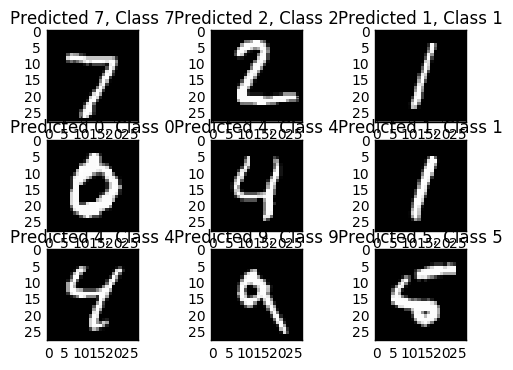

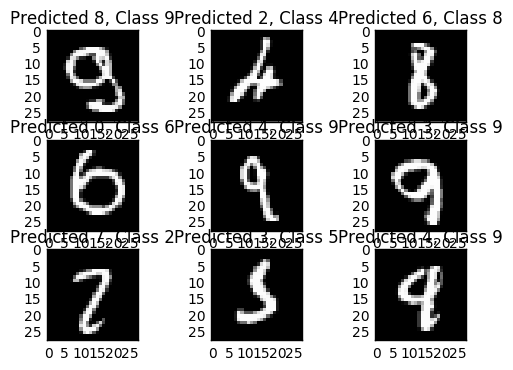

In [176]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))